<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-1---Exploring-Tick,-Volume,-DV-Bars" data-toc-modified-id="Chapter-1---Exploring-Tick,-Volume,-DV-Bars-1" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 1 - Exploring Tick, Volume, DV Bars</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Read-and-Clean-Data" data-toc-modified-id="Read-and-Clean-Data-1.2" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Read and Clean Data</a></span></li><li><span><a href="#Remove-Obvious-Price-Errors-in-Tick-Data" data-toc-modified-id="Remove-Obvious-Price-Errors-in-Tick-Data-1.3" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Remove Obvious Price Errors in Tick Data</a></span></li></ul></li><li><span><a href="#Tick-Bars" data-toc-modified-id="Tick-Bars-2" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tick Bars</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Bonus-Exercise:-Make-OHLC-Bars-from-Custom-Bars" data-toc-modified-id="Bonus-Exercise:-Make-OHLC-Bars-from-Custom-Bars-2.0.1" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Bonus Exercise: Make OHLC Bars from Custom Bars</a></span></li></ul></li></ul></li><li><span><a href="#Volume-Bars" data-toc-modified-id="Volume-Bars-3" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">3&nbsp;&nbsp;</span>Volume Bars</a></span></li><li><span><a href="#Dollar-Value-Bars" data-toc-modified-id="Dollar-Value-Bars-4" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dollar Value Bars</a></span></li><li><span><a href="#Analyzing-the-Bars" data-toc-modified-id="Analyzing-the-Bars-5" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analyzing the Bars</a></span><ul class="toc-item"><li><span><a href="#Count-Quantity-of-Bars-By-Each-Bar-Type-(Weekly)" data-toc-modified-id="Count-Quantity-of-Bars-By-Each-Bar-Type-(Weekly)-5.1" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Count Quantity of Bars By Each Bar Type (Weekly)</a></span></li><li><span><a href="#Which-Bar-Type-Has-Most-Stable-Counts?" data-toc-modified-id="Which-Bar-Type-Has-Most-Stable-Counts?-5.2" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Which Bar Type Has Most Stable Counts?</a></span></li><li><span><a href="#Which-Bar-Type-Has-the-Lowest-Serial-Correlation?" data-toc-modified-id="Which-Bar-Type-Has-the-Lowest-Serial-Correlation?-5.3" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Which Bar Type Has the Lowest Serial Correlation?</a></span></li><li><span><a href="#Partition-Bar-Series-into-Monthly,-Compute-Variance-of-Returns,-and-Variance-of-Variance" data-toc-modified-id="Partition-Bar-Series-into-Monthly,-Compute-Variance-of-Returns,-and-Variance-of-Variance-5.4" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Partition Bar Series into Monthly, Compute Variance of Returns, and Variance of Variance</a></span></li><li><span><a href="#Compute-Jarque-Bera-Test,-Which-Has-Lowest-Test-Statistic?" data-toc-modified-id="Compute-Jarque-Bera-Test,-Which-Has-Lowest-Test-Statistic?-5.5" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Compute Jarque-Bera Test, Which Has Lowest Test Statistic?</a></span></li><li><span><a href="#Compute-Shapiro-Wilk-Test" data-toc-modified-id="Compute-Shapiro-Wilk-Test-5.6" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Compute Shapiro-Wilk Test</a></span></li></ul></li><li><span><a href="#Compare-Serial-Correlation-between-Dollar-and-Dollar-Imbalance-Bars" data-toc-modified-id="Compare-Serial-Correlation-between-Dollar-and-Dollar-Imbalance-Bars-6" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">6&nbsp;&nbsp;</span>Compare Serial Correlation between Dollar and Dollar Imbalance Bars</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Update-[05.04.18]" data-toc-modified-id="Update-[05.04.18]-6.0.1" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Update [05.04.18]</a></span></li></ul></li></ul></li></ul></div>

Advances in Machine Learning

time bars vs. tick bars, volume bars, dollar bars, and dollar imbalance bars.

# Chapter 1 - Exploring Tick, Volume, DV Bars

In [1]:
%load_ext watermark
%watermark

%load_ext autoreload
%autoreload 2

# import standard libs
from IPython.display import display
from IPython.core.debugger import set_trace as bp
from pathlib import PurePath, Path, PureWindowsPath
import sys
import time
from collections import OrderedDict as od
import re
import os
import json
os.environ['THEANO_FLAGS'] = 'device=cpu,floatX=float32'

# import python scientific stack
import pandas as pd
import pandas_datareader.data as web
pd.set_option('display.max_rows', 100)
from dask import dataframe as dd
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.graphics.api as smg
from numba import jit
import math
#import pymc3 as pm   install failed here, to be fixed..
from theano import shared, theano as tt

# import visual tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-talk')
plt.style.use('bmh')

plt.rcParams['font.family'] = 'DejaVu Sans Mono'
plt.rcParams['font.size'] = 9.5
plt.rcParams['font.weight'] = 'medium'
plt.rcParams['figure.figsize'] = 10,7
blue, green, red, purple, gold, teal = sns.color_palette('colorblind', 6)

# import util libs

import pyarrow as pa
import pyarrow.parquet as pq
from tqdm import tqdm, tqdm_notebook
import warnings
warnings.filterwarnings("ignore")
import missingno as msno

from src.utils.utils import *
from src.features.bars import get_imbalance
import src.features.bars as brs
import src.features.snippets as snp

RANDOM_STATE = 777

print()
%watermark -p pandas,pandas_datareader,dask,numpy,pymc3,theano,sklearn,statsmodels,scipy,matplotlib,seaborn,pyarrow,fastparquet

2020-10-08T15:26:20+08:00

CPython 3.7.3
IPython 7.4.0

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores  : 12
interpreter: 64bit


C:\IT\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\IT\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.



pandas 0.24.2
pandas_datareader 0.7.4
dask 1.1.4
numpy 1.16.2
pymc3 3.9.3
theano 1.0.5
sklearn 0.20.3
statsmodels 0.12.0
scipy 1.4.1
matplotlib 3.0.3
seaborn 0.9.0
pyarrow 0.11.1
fastparquet not installed


## Introduction

This notebook explores the idea of sampling prices as a function of something other than fixed time intervals. For example using the number of ticks, volume or dollar volume traded as the sampling interval. The rest of this notebook works through some of the exercises found in chapters 1 and 2 of the book. 

This notebook makes use of the following script found here: `./src/features/bars.py`

## Read and Clean Data

The data set used in this example is too large to be hosted on github. It is a sample of equity tick data, symbol `IVE`, provided by [kibot.com (caution: download link)](http://api.kibot.com/?action=history&symbol=IVE&interval=tickbidask&bp=1&user=guest). Download this data to the `./data/raw/` directory in your local repo.

In [2]:
def read_kibot_ticks(fp):
    # read tick data from http://www.kibot.com/support.aspx#data_format
    cols = list(map(str.lower,['Date','Time','Price','Bid','Ask','Size']))
    df = (pd.read_csv(fp, header=None)
          .rename(columns=dict(zip(range(len(cols)),cols)))
          .assign(dates=lambda df: (pd.to_datetime(df['date']+df['time'],
                                                  format='%m/%d/%Y%H:%M:%S')))
          .assign(v=lambda df: df['size']) # volume
          .assign(dv=lambda df: df['price']*df['size']) # dollar volume
          .drop(['date','time'],axis=1)
          .set_index('dates')
          .drop_duplicates())
    return df

infp = PurePath('c:/Users/MEC/Documents/AI/Adv_Fin_ML_Exercises-master/Adv_Fin_ML_Exercises-master/data/raw/IVE_tickbidask.txt')

df = read_kibot_ticks(infp)
cprint(df)
df.head()

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask   size      v        dv
dates                                                              
2017-03-21 15:41:44  103.93  103.92  103.93  114.0  114.0  11848.02
2017-03-21 15:41:51  103.90  103.90  103.91  699.0  699.0  72626.10
2017-03-21 15:41:51  103.90  103.90  103.91  401.0  401.0  41663.90
2017-03-21 15:41:51  103.90  103.90  103.91  199.0  199.0  20676.10
2017-03-21 15:41:53    1.00     NaN     NaN    NaN    NaN       NaN
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1129133 entries, 2009-09-28 09:30:00 to 2017-03-21 15:41:53
Data columns (total 6 columns):
price    1129133 non-null float64
bid      1129132 non-null float64
ask      1129132 non-null float64
size     1129132 non-null float64
v        1

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:30:00,50.79,50.70,50.79,100.0,100.0,5079.00
2009-09-28 09:30:00,50.71,50.70,50.79,638.0,638.0,32352.98
2009-09-28 09:31:32,50.75,50.75,50.76,100.0,100.0,5075.00
2009-09-28 09:31:33,50.75,50.72,50.75,100.0,100.0,5075.00
2009-09-28 09:31:50,50.75,50.73,50.76,300.0,300.0,15225.00


In [3]:
df.tail()

,price,bid,ask,size,v,dv
dates,,,,,,
2017-03-21 15:41:44,103.93,103.92,103.93,114.0,114.0,11848.02
2017-03-21 15:41:51,103.90,103.90,103.91,699.0,699.0,72626.10
2017-03-21 15:41:51,103.90,103.90,103.91,401.0,401.0,41663.90
2017-03-21 15:41:51,103.90,103.90,103.91,199.0,199.0,20676.10
2017-03-21 15:41:53,1.00,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1129132 entries, 2009-09-28 09:30:00 to 2017-03-21 15:41:51
Data columns (total 6 columns):
price    1129132 non-null float64
bid      1129132 non-null float64
ask      1129132 non-null float64
size     1129132 non-null float64
v        1129132 non-null float64
dv       1129132 non-null float64
dtypes: float64(6)
memory usage: 60.3 MB


Save initial processed data as parquet in the `./data/interim/` folder and reload.

In [6]:
outfp = PurePath('c:/Users/MEC/Documents/AI/Adv_Fin_ML_Exercises-master/Adv_Fin_ML_Exercises-master/data/interim/IVE_tickbidask.parq')
df.to_parquet(outfp)

In [7]:
df.tail()

,price,bid,ask,size,v,dv
dates,,,,,,
2017-03-21 15:41:15,103.9633,103.96,103.97,265.0,265.0,27550.2745
2017-03-21 15:41:44,103.9300,103.92,103.93,114.0,114.0,11848.0200
2017-03-21 15:41:51,103.9000,103.90,103.91,699.0,699.0,72626.1000
2017-03-21 15:41:51,103.9000,103.90,103.91,401.0,401.0,41663.9000
2017-03-21 15:41:51,103.9000,103.90,103.91,199.0,199.0,20676.1000


In [8]:
infp=PurePath('c:/Users/MEC/Documents/AI/Adv_Fin_ML_Exercises-master/Adv_Fin_ML_Exercises-master/data/interim/IVE_tickbidask.parq')
df = pd.read_parquet(infp)

In [9]:
df.head()

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:30:00,50.79,50.70,50.79,100.0,100.0,5079.00
2009-09-28 09:30:00,50.71,50.70,50.79,638.0,638.0,32352.98
2009-09-28 09:31:32,50.75,50.75,50.76,100.0,100.0,5075.00
2009-09-28 09:31:33,50.75,50.72,50.75,100.0,100.0,5075.00
2009-09-28 09:31:50,50.75,50.73,50.76,300.0,300.0,15225.00


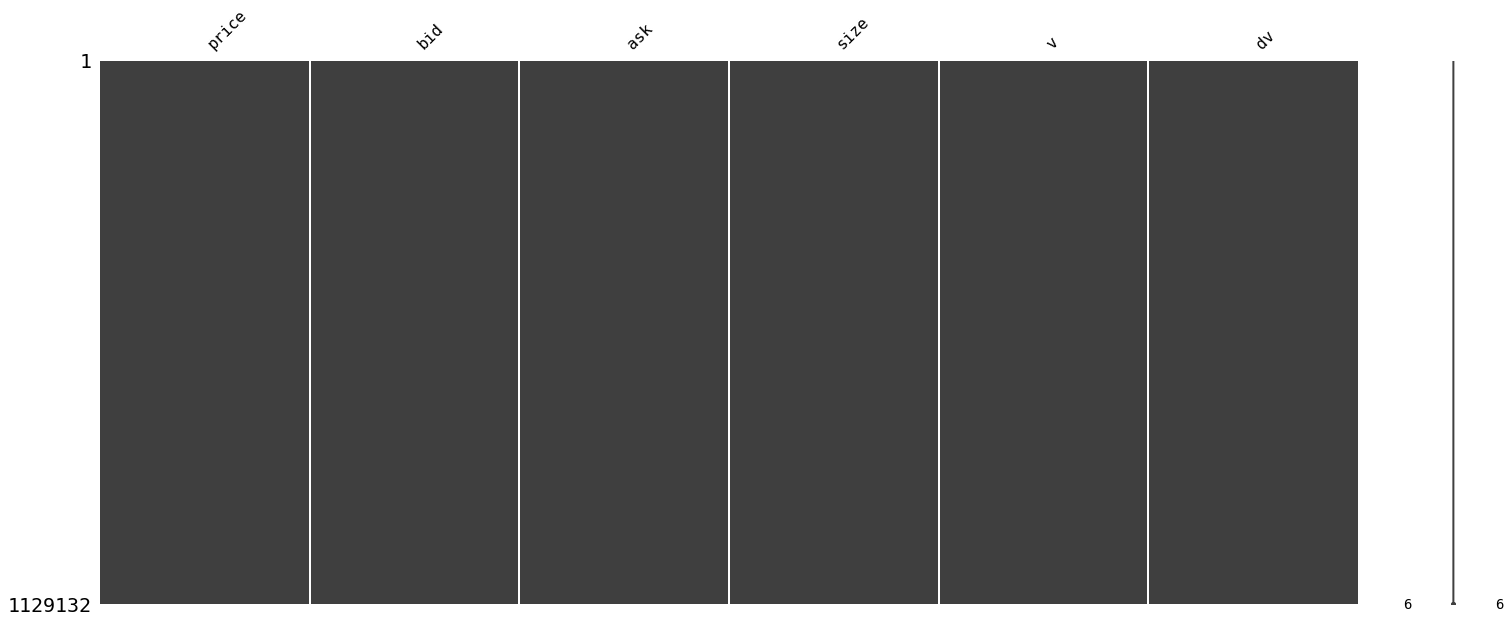

In [10]:
msno.matrix(df)

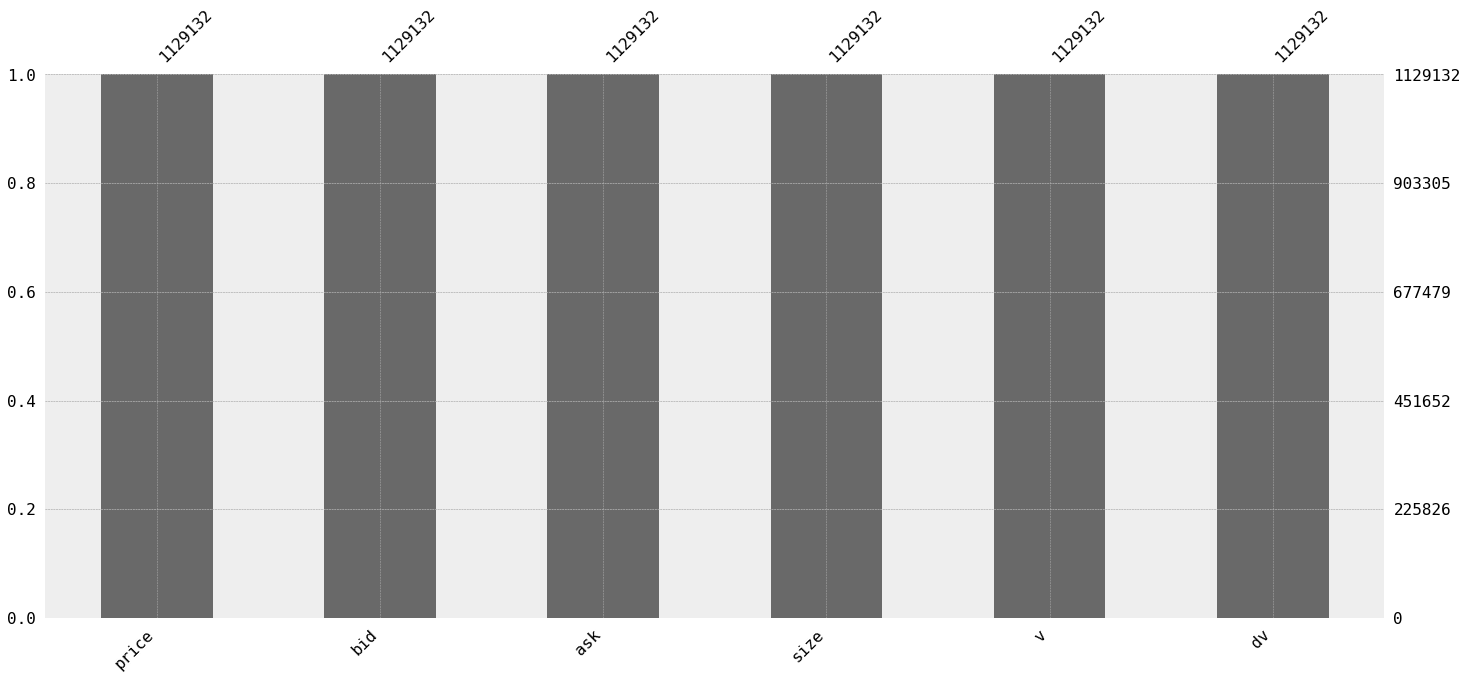

In [11]:
msno.bar(df)

## Remove Obvious Price Errors in Tick Data

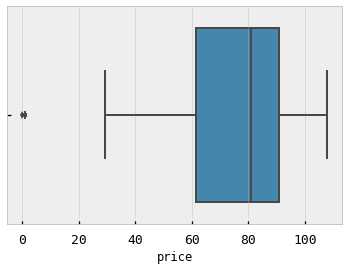

In [12]:
sns.boxplot(df.price)

In [13]:
@jit(nopython=True)
def mad_outlier(y, thresh=3.):
    '''
    compute outliers based on mad
    # args
        y: assumed to be array with shape (N,1)
        thresh: float()
    # returns
        array index of outliers
    '''
    median = np.median(y)
    diff = np.sum((y - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [14]:
mad = mad_outlier(df.price.values.reshape(-1,1))

In [15]:
df.loc[mad]

,price,bid,ask,size,v,dv
dates,,,,,,
2010-05-06 14:49:07,0.11,0.10,44.03,500.0,500.0,55.0
2010-05-06 14:53:30,1.10,1.10,30.28,2600.0,2600.0,2860.0
2010-05-06 14:55:32,1.10,1.10,50.57,300.0,300.0,330.0
2010-05-06 14:55:32,1.10,1.10,50.57,100.0,100.0,110.0
2010-05-06 14:55:32,1.10,1.00,50.57,200.0,200.0,220.0
2010-05-06 14:55:32,1.10,1.00,50.57,700.0,700.0,770.0
2010-05-06 14:55:32,1.10,1.00,50.57,1200.0,1200.0,1320.0
2010-05-06 14:55:32,1.10,0.55,50.57,500.0,500.0,550.0
2010-05-06 14:55:32,1.10,0.55,50.57,100.0,100.0,110.0


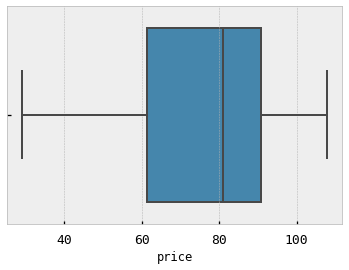

In [16]:
sns.boxplot(df.loc[~mad].price)

Drop outliers from dataset and save cleaned data in the `./data/processed/` folder.

In [17]:
df = df.loc[~mad]
#cprint(df)

outfp = PurePath('c:/Users/MEC/Documents/AI/Adv_Fin_ML_Exercises-master/Adv_Fin_ML_Exercises-master/data/processed/clean_IVE_fut_prices.parq')
df.to_parquet(outfp)

In [18]:
infp=PurePath('c:/Users/MEC/Documents/AI/Adv_Fin_ML_Exercises-master/Adv_Fin_ML_Exercises-master/data/processed/clean_IVE_fut_prices.parq')
df = pd.read_parquet(infp)
#cprint(df)

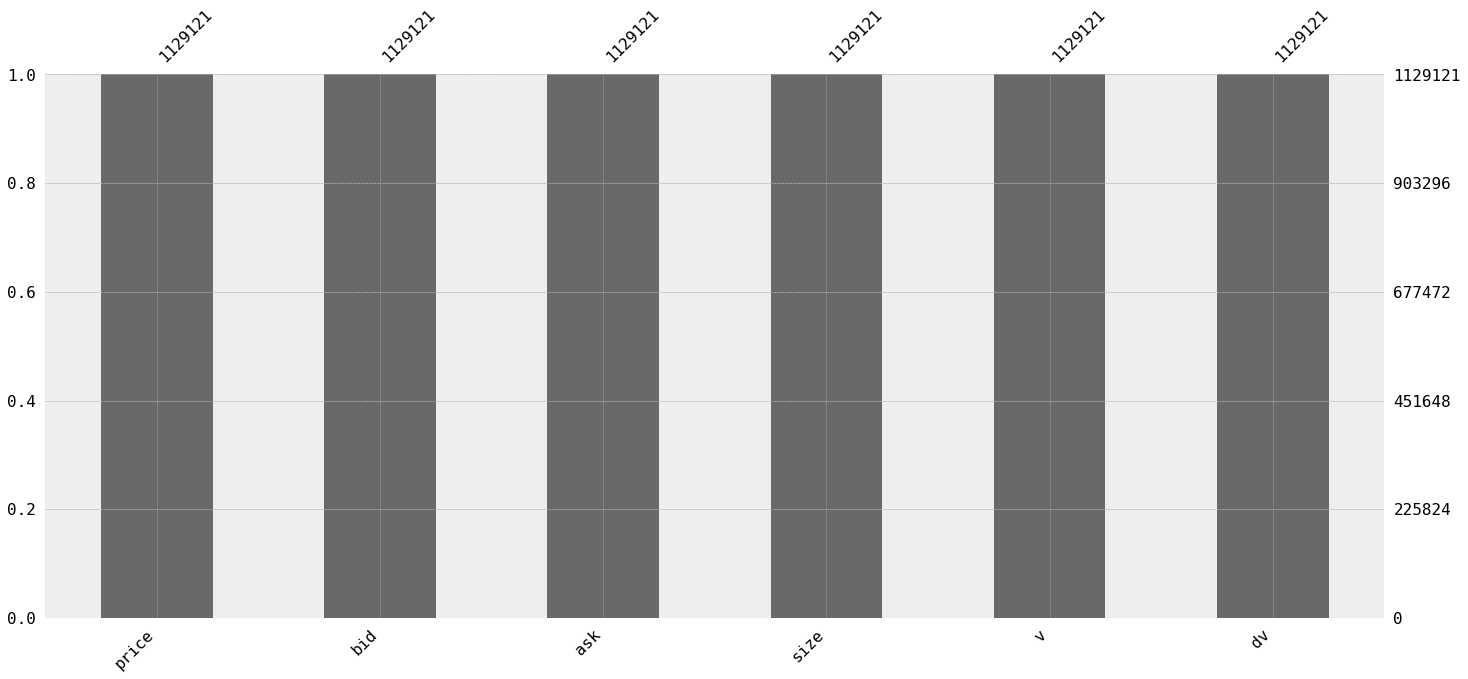

In [19]:
msno.bar(df)

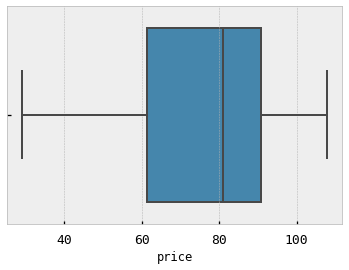

In [20]:
sns.boxplot(df.price)

# Tick Bars

In [21]:
def tick_bars(df, price_column, m):
    '''
    compute tick bars

    # args
        df: pd.DataFrame()
        column: name for price data
        m: int(), threshold value for ticks
    # returns
        idx: list of indices
    '''
    t = df[price_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += 1
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def tick_bar_df(df, price_column, m):
    idx = tick_bars(df, price_column, m)
    return df.iloc[idx].drop_duplicates()

There are many ways to choose `M`, or the threshold value for sampling prices. One way is based on ratios of total dollar value/volume traded vs number of ticks. The rest of the notebook uses an arbitrary but sensible `M` value. I leave it as an exercise for the reader to see how the results change based on different values of `M`.

In [22]:
n_ticks = df.shape[0]
volume_ratio = (df.v.sum()/n_ticks).round()
dollar_ratio = (df.dv.sum()/n_ticks).round()
print(f'num ticks: {n_ticks:,}')
print(f'volume ratio: {volume_ratio}')
print(f'dollar ratio: {dollar_ratio}')

num ticks: 1,129,121
volume ratio: 534.0
dollar ratio: 41416.0


In [23]:
tick_M = 100 # arbitrary
print(f'tick threshold: {tick_M:,}')
tidx = tick_bars(df, 'price', tick_M)
tidx[:10]

tick threshold: 100


100%|███████████████████████████████████████████████████████████████████| 1129121/1129121 [00:00<00:00, 2822463.68it/s]


[99, 199, 299, 399, 499, 599, 699, 799, 899, 999]

In [24]:
df.iloc[tidx].shape, df.shape

((11291, 6), (1129121, 6))

Dataset is large so select smaller example for quick exploration

In [25]:
tick_df = tick_bar_df(df, 'price', tick_M)
tick_df.shape

100%|███████████████████████████████████████████████████████████████████| 1129121/1129121 [00:00<00:00, 2867527.63it/s]


(11291, 6)

In [26]:
tick_df.head()

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:53:14,51.1500,51.15,51.18,100.0,100.0,5115.00
2009-09-28 10:02:52,51.2500,51.24,51.26,2000.0,2000.0,102500.00
2009-09-28 10:22:24,51.1961,51.19,51.20,1100.0,1100.0,56315.71
2009-09-28 10:38:44,51.3650,51.36,51.36,100.0,100.0,5136.50
2009-09-28 11:24:29,51.3200,51.32,51.33,2000.0,2000.0,102640.00


In [27]:
def select_sample_data(ref, sub, price_col, date):
    '''
    select a sample of data based on date, assumes datetimeindex
    
    # args
        ref: pd.DataFrame containing all ticks
        sub: subordinated pd.DataFrame of prices
        price_col: str(), price column
        date: str(), date to select
    # returns
        xdf: ref pd.Series
        xtdf: subordinated pd.Series
    '''
    xdf = ref[price_col].loc[date]
    xtdf = sub[price_col].loc[date]
    return xdf, xtdf

## try different dates to see how the quantity of tick bars changes
xDate ='2009-10-01' #'2017-10-4'
xdf, xtdf = select_sample_data(df, tick_df, 'price', xDate)

xdf.shape, xtdf.shape

((1466,), (15,))

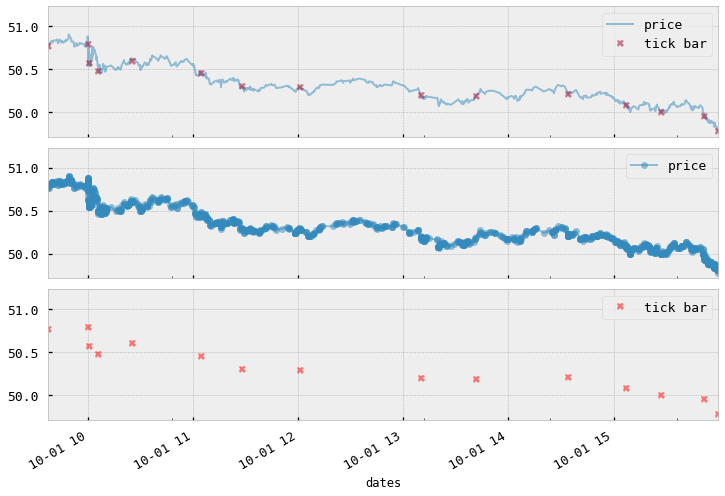

In [28]:
def plot_sample_data(ref, sub, bar_type, *args, **kwds):
    f,axes=plt.subplots(3,sharex=True, sharey=True, figsize=(10,7))
    ref.plot(*args, **kwds, ax=axes[0], label='price')
    sub.plot(*args, **kwds, ax=axes[0], marker='X', ls='', label=bar_type)
    axes[0].legend();
    
    ref.plot(*args, **kwds, ax=axes[1], label='price', marker='o')
    sub.plot(*args, **kwds, ax=axes[2], ls='', marker='X',
             color='r', label=bar_type)

    for ax in axes[1:]: ax.legend()
    plt.tight_layout()
    
    return

plot_sample_data(xdf, xtdf, 'tick bar', alpha=0.5, markersize=7)

In [29]:
tick_M = volume_ratio  # Exercise
print(f'tick threshold: {tick_M:,}')
tidx = tick_bars(df, 'price', tick_M)
tidx[:10]

tick threshold: 534.0


100%|███████████████████████████████████████████████████████████████████| 1129121/1129121 [00:00<00:00, 1903860.09it/s]


[533, 1067, 1601, 2135, 2669, 3203, 3737, 4271, 4805, 5339]

In [30]:
df.iloc[tidx].shape, df.shape

((2114, 6), (1129121, 6))

In [31]:
tick_df2 = tick_bar_df(df, 'price', tick_M)
tick_df2.shape

100%|███████████████████████████████████████████████████████████████████| 1129121/1129121 [00:00<00:00, 1893223.09it/s]


(2114, 6)

In [32]:
tick_df2.head()

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 11:32:58,51.3991,51.39,51.40,800.0,800.0,41119.28
2009-09-28 15:39:46,51.4990,51.49,51.50,1500.0,1500.0,77248.50
2009-09-29 11:32:13,51.5900,51.58,51.59,161.0,161.0,8305.99
2009-09-30 09:45:16,51.1800,51.17,51.19,100.0,100.0,5118.00
2009-09-30 14:33:39,51.3100,51.29,51.31,500.0,500.0,25655.00


In [33]:
xDate ='2009-10-01' #'2017-10-4'
xdf, xtdf = select_sample_data(df, tick_df2, 'price', xDate)

xdf.shape, xtdf.shape

((1466,), (3,))

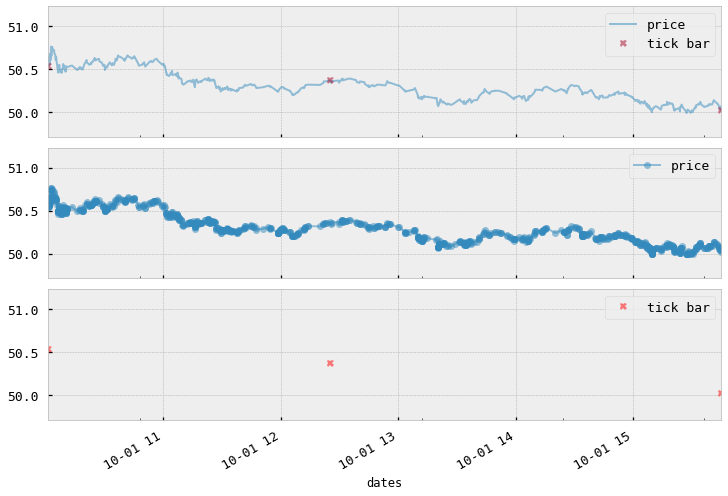

In [34]:
plot_sample_data(xdf, xtdf, 'tick bar', alpha=0.5, markersize=7)

### Bonus Exercise: Make OHLC Bars from Custom Bars

Extract `tick_df.price` and `df.price` into two pandas series.

In [35]:
sub = tick_df.price
ref = df.price

The function below creates the OHLC dataframe by:
    1. Iterating over the subordinated series' index extracting idx and idx+1 period
    2. Selecting the same date period from the reference series
    3. Extracting the max, min prices from the reference series.
    4. Combining the o,h,l,c and start and end timestamps into a row
    5. Returning the aggregated rows as a pandas dataframe.

In [36]:
def get_ohlc(ref, sub):
    '''
    fn: get ohlc from custom bars
    
    # args
        ref : reference pandas series with all prices
        sub : custom tick pandas series
    # returns
        tick_df : dataframe with ohlc values
    '''
    ohlc = []
    for i in tqdm(range(sub.index.shape[0]-1)):
        start,end = sub.index[i], sub.index[i+1]
        tmp_ref = ref.loc[start:end]
        max_px, min_px = tmp_ref.max(), tmp_ref.min()
        o,h,l,c = sub.iloc[i], max_px, min_px, sub.iloc[i+1]
        ohlc.append((end,start,o,h,l,c))
    cols = ['end','start','open','high','low','close']
    return (pd.DataFrame(ohlc,columns=cols))

## uncomment below to run (takes about 5-6 mins on my machine)
#tick_bars_ohlc = get_ohlc(ref, sub)
#cprint(tick_bars_ohlc)

#outfp = PurePath(data_dir/'processed'/'tick_bars_ohlc.parq')
#tick_bars_ohlc.to_parquet(outfp)

In [37]:
tick_bars_ohlc = get_ohlc(ref, sub)
#cprint(tick_bars_ohlc)

outfp = PurePath('c:/Users/MEC/Documents/AI/Adv_Fin_ML_Exercises-master/Adv_Fin_ML_Exercises-master/data/processed/tick_bars_ohlc.parq')
tick_bars_ohlc.to_parquet(outfp)

100%|██████████████████████████████████████████████████████████████████████████| 11290/11290 [00:03<00:00, 3449.89it/s]


In [38]:
tick_bars_ohlc.tail()

,end,start,open,high,low,close
11285,2017-03-21 13:52:38,2017-03-21 13:24:10,103.9700,104.1900,103.96,103.9900
11286,2017-03-21 14:20:31,2017-03-21 13:52:38,103.9900,104.2000,103.88,104.1725
11287,2017-03-21 14:47:55,2017-03-21 14:20:31,104.1725,104.2625,104.00,104.0663
11288,2017-03-21 15:10:52,2017-03-21 14:47:55,104.0663,104.2255,103.97,104.2000
11289,2017-03-21 15:38:27,2017-03-21 15:10:52,104.2000,104.2192,104.03,104.0300


# Volume Bars

In [39]:
def volume_bars(df, volume_column, m):
    '''
    compute volume bars

    # args
        df: pd.DataFrame()
        volume_column: name for volume data
        m: int(), threshold value for volume
    # returns
        idx: list of indices
    '''
    t = df[volume_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += x
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def volume_bar_df(df, volume_column, m):
    idx = volume_bars(df, volume_column, m)
    return df.iloc[idx].drop_duplicates()

In [40]:
volume_M =  10_000 # arbitrary 
print(f'volume threshold: {volume_M:,}')
v_bar_df = volume_bar_df(df, 'v', volume_M)
#cprint(v_bar_df)

volume threshold: 10,000


100%|███████████████████████████████████████████████████████████████████| 1129121/1129121 [00:00<00:00, 2818319.99it/s]


In [41]:
v_bar_df.head()

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:44:09,50.91,50.91,50.92,1100.0,1100.0,56001.0
2009-09-28 09:46:35,51.07,51.05,51.07,3300.0,3300.0,168531.0
2009-09-28 09:52:47,51.13,51.13,51.14,2000.0,2000.0,102260.0
2009-09-28 09:54:36,51.13,51.11,51.13,400.0,400.0,20452.0
2009-09-28 09:54:41,51.14,51.13,51.14,700.0,700.0,35798.0


xdf shape: (488,), xtdf shape: (29,)


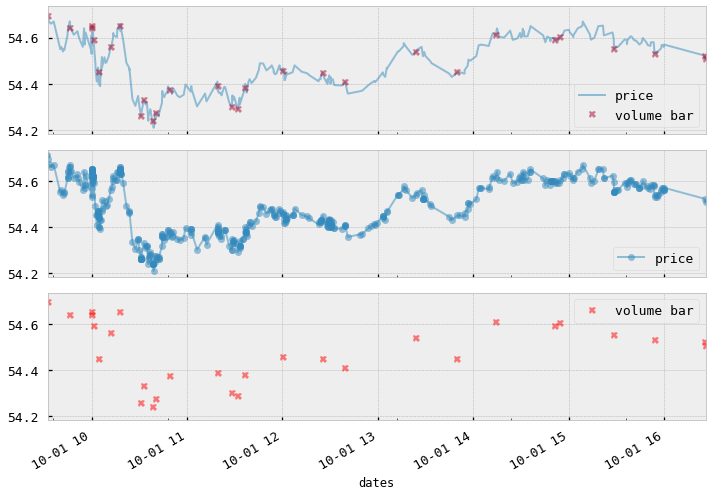

In [42]:
xDate = '2010-10-1'
xdf, xtdf = select_sample_data(df, v_bar_df, 'price', xDate)
print(f'xdf shape: {xdf.shape}, xtdf shape: {xtdf.shape}')

plot_sample_data(xdf, xtdf, 'volume bar', alpha=0.5, markersize=7)  

# Dollar Value Bars

In [43]:
def dollar_bars(df, dv_column, m):
    '''
    compute dollar bars

    # args
        df: pd.DataFrame()
        dv_column: name for dollar volume data
        m: int(), threshold value for dollars
    # returns
        idx: list of indices
    '''
    t = df[dv_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += x
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def dollar_bar_df(df, dv_column, m):
    idx = dollar_bars(df, dv_column, m)
    return df.iloc[idx].drop_duplicates()

In [44]:
dollar_M = 1_000_000 # arbitrary 
print(f'dollar threshold: {dollar_M:,}')
dv_bar_df = dollar_bar_df(df, 'dv', dollar_M)


dollar threshold: 1,000,000


100%|███████████████████████████████████████████████████████████████████| 1129121/1129121 [00:00<00:00, 2854626.49it/s]


In [45]:
dv_bar_df.tail()

,price,bid,ask,size,v,dv
dates,,,,,,
2017-03-21 15:21:50,104.1100,104.11,104.12,3000.0,3000.0,312330.000
2017-03-21 15:26:40,104.1701,104.17,104.18,9400.0,9400.0,979198.940
2017-03-21 15:30:38,104.1400,104.13,104.14,900.0,900.0,93726.000
2017-03-21 15:37:43,104.0909,104.09,104.10,110.0,110.0,11449.999
2017-03-21 15:40:53,103.9700,103.96,103.97,2000.0,2000.0,207940.000


In [46]:
df.tail(40)

,price,bid,ask,size,v,dv
dates,,,,,,
2017-03-21 15:31:32,104.1175,104.12,104.13,100.0,100.0,10411.7500
2017-03-21 15:31:47,104.1300,104.13,104.14,489.0,489.0,50919.5700
2017-03-21 15:31:47,104.1300,104.13,104.14,111.0,111.0,11558.4300
2017-03-21 15:32:20,104.1300,104.12,104.13,199.0,199.0,20721.8700
2017-03-21 15:32:24,104.1300,104.13,104.14,2301.0,2301.0,239603.1300
2017-03-21 15:32:37,104.1400,104.14,104.15,340.0,340.0,35407.6000
2017-03-21 15:32:37,104.1400,104.14,104.15,160.0,160.0,16662.4000
2017-03-21 15:34:16,104.0900,104.08,104.09,548.0,548.0,57041.3200
2017-03-21 15:34:19,104.0900,104.08,104.09,150.0,150.0,15613.5000


xdf shape: (1466,), xtdf shape: (26,)


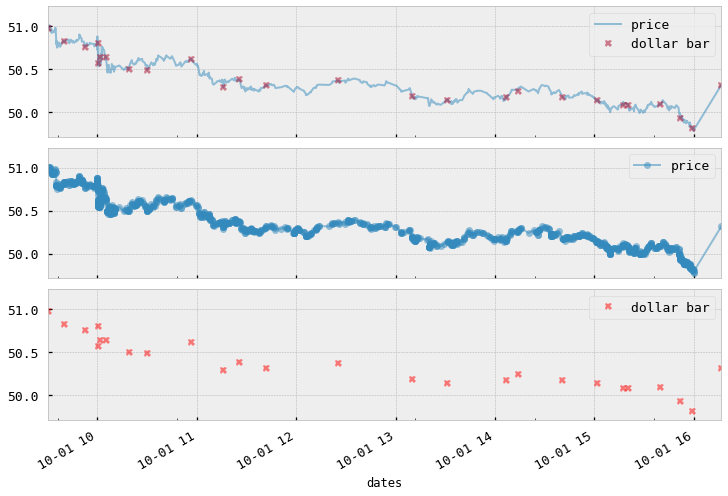

In [47]:
xDate = '2009-10-1'
xdf, xtdf = select_sample_data(df, dv_bar_df, 'price', xDate)
print(f'xdf shape: {xdf.shape}, xtdf shape: {xtdf.shape}')

plot_sample_data(xdf, xtdf, 'dollar bar', alpha=0.5, markersize=7)  

# Analyzing the Bars

## Count Quantity of Bars By Each Bar Type (Weekly)

In [48]:
def count_bars(df, price_col='price'):
    return df.groupby(pd.TimeGrouper('1W'))[price_col].count()

def scale(s):
    return (s-s.min())/(s.max()-s.min())

In [49]:
# count series
# scale to compare 'apples to apples'
tc = scale(count_bars(tick_df))
vc = scale(count_bars(v_bar_df))
dc = scale(count_bars(dv_bar_df))
dfc = scale(count_bars(df))

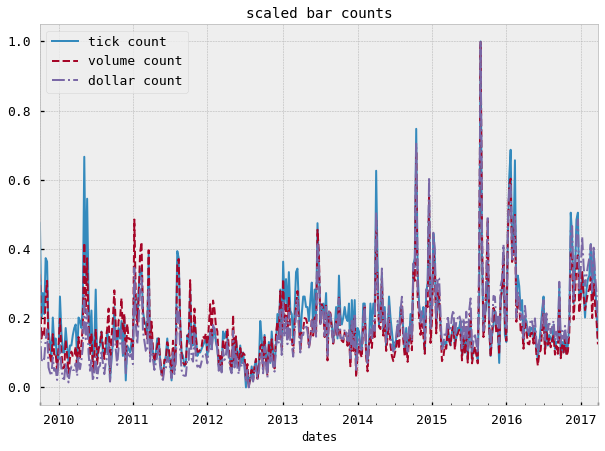

In [50]:
# plot time series of count

f,ax=plt.subplots(figsize=(10,7))

tc.plot(ax=ax, ls='-', label='tick count')
vc.plot(ax=ax, ls='--', label='volume count')
dc.plot(ax=ax, ls='-.', label='dollar count')

ax.set_title('scaled bar counts')
ax.legend()

## Which Bar Type Has Most Stable Counts?

In [51]:
print(f'tc std: {tc.std():.2%}, vc std: {vc.std():.2%}, dc std: {dc.std():.2%}')

bar_types = ['tick','volume','dollar','df']
bar_std = [tc.std(),vc.std(),dc.std(),dfc.std()]
counts = (pd.Series(bar_std,index=bar_types))
counts.sort_values()

tc std: 12.07%, vc std: 10.92%, dc std: 11.83%


volume    0.109205
dollar    0.118333
tick      0.120695
df        0.121785
dtype: float64

## Which Bar Type Has the Lowest Serial Correlation?

In [52]:
def returns(s):
    arr = np.diff(np.log(s))
    return (pd.Series(arr, index=s.index[1:]))

In [53]:
tr = returns(tick_df.price)
vr = returns(v_bar_df.price)
dr = returns(dv_bar_df.price)
df_ret = returns(df.price)   

bar_returns = [tr, vr, dr, df_ret]

In [54]:
def get_test_stats(bar_types,bar_returns,test_func,*args,**kwds):
    
    dct = {bar:(int(bar_ret.shape[0]), test_func(bar_ret,*args,**kwds)) 
           for bar,bar_ret in zip(bar_types,bar_returns)}
    df = (pd.DataFrame.from_dict(dct)
          .rename(index={0:'sample_size',1:f'{test_func.__name__}_stat'})
          .T)
    return df

autocorrs = get_test_stats(bar_types,bar_returns,pd.Series.autocorr)
display(autocorrs.sort_values('autocorr_stat'),
        autocorrs.abs().sort_values('autocorr_stat'))

,sample_size,autocorr_stat
dollar,37782.0,-0.127882
df,1129120.0,-0.092525
volume,48436.0,-0.017763
tick,11290.0,0.063133


,sample_size,autocorr_stat
volume,48436.0,0.017763
tick,11290.0,0.063133
df,1129120.0,0.092525
dollar,37782.0,0.127882


In [55]:
def plot_autocorr(bar_types,bar_returns):
    f,axes=plt.subplots(len(bar_types),figsize=(10,7))

    for i, (bar, typ) in enumerate(zip(bar_returns, bar_types)):
        smg.tsa.plot_acf(bar, lags=120, ax=axes[i],
                                 alpha=0.05, unbiased=True, fft=True,
                                 zero=False,
                                 title=f'{typ} AutoCorr')
    plt.tight_layout()   
    
def plot_hist(bar_types,bar_rets):
    f,axes=plt.subplots(len(bar_types),figsize=(10,6))
    for i, (bar, typ) in enumerate(zip(bar_returns, bar_types)):
        g = sns.distplot(bar, ax=axes[i], kde=False, label=typ)
        g.set(yscale='log')
        axes[i].legend()
    plt.tight_layout()     

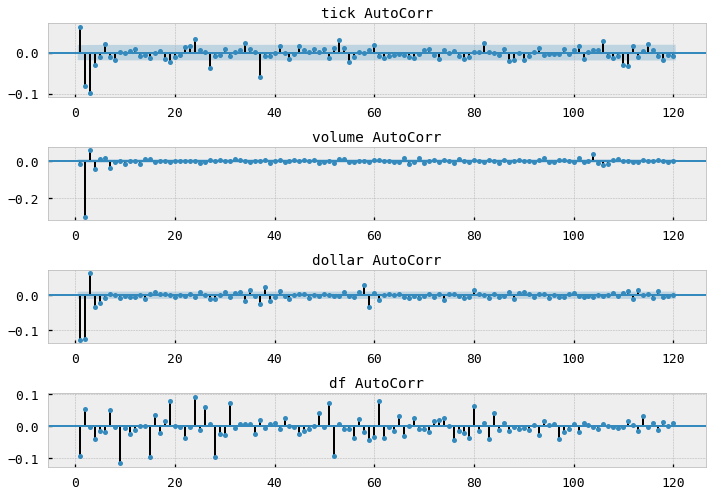

In [56]:
 plot_autocorr(bar_types,bar_returns)

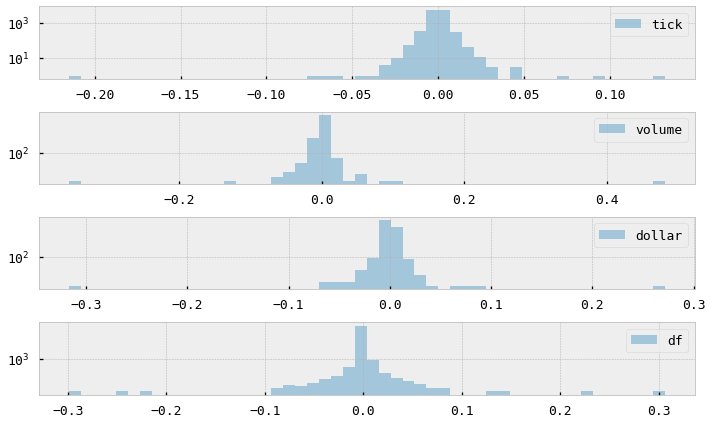

In [57]:
plot_hist(bar_types,bar_returns)

## Partition Bar Series into Monthly, Compute Variance of Returns, and Variance of Variance

In [58]:
def partition_monthly(s):
    return s.resample('1M').var()

In [59]:
tr_rs = partition_monthly(tr)
vr_rs = partition_monthly(vr)
dr_rs = partition_monthly(dr)
df_ret_rs = partition_monthly(df_ret)
monthly_vars = [tr_rs, vr_rs, dr_rs, df_ret_rs]

In [60]:
get_test_stats(bar_types,monthly_vars,np.var).sort_values('var_stat')

,sample_size,var_stat
df,91.0,6.369022e-12
tick,91.0,2.249338e-09
dollar,91.0,2.520678e-09
volume,91.0,3.262948e-09


## Compute Jarque-Bera Test, Which Has Lowest Test Statistic?

In [61]:
def jb(x,test=True): 
    np.random.seed(12345678)
    if test: return stats.jarque_bera(x)[0]
    return stats.jarque_bera(x)[1]

get_test_stats(bar_types,bar_returns,jb).sort_values('jb_stat')

,sample_size,jb_stat
tick,11290.0,8.326276e+07
dollar,37782.0,2.628628e+10
volume,48436.0,1.896350e+11
df,1129120.0,1.156081e+14


## Compute Shapiro-Wilk Test

Shapiro-Wilk test statistic > larger is better.

In [62]:
def shapiro(x,test=True): 
    np.random.seed(12345678)
    if test: return stats.shapiro(x)[0]
    return stats.shapiro(x)[1]

(get_test_stats(bar_types,bar_returns,shapiro)
 .sort_values('shapiro_stat')[::-1])

,sample_size,shapiro_stat
tick,11290.0,0.648796
dollar,37782.0,0.399860
volume,48436.0,0.271589
df,1129120.0,0.169642


# Compare Serial Correlation between Dollar and Dollar Imbalance Bars

### Update [05.04.18]

Earlier version was missing some additional code. Before we can compare we must compute the Dollar Imbalance Bar. This is my initial implementation of this concept but is experimental and may need some adjustments. 

   1. Compute the sequence ${bt}_{t=1,...,T}$.
   2. Compute the imbalance at time $T$ defined as $\theta_T = \sum_{t=1}^{T}b_tv_t$.
   3. Compute the expected value of $T$ as ewma of previous $T$ values.
   4. Compute the expected value of $\theta_T$ as ewma of $b_tv_t$ values.
   5. for each index:
        - compute $\lvert\theta_t\rvert >= E_0[T] * \lvert2v^+-E_0[v_t]\rvert$
        - if the condition is met capture the quantity of ticks
        - reset tick count
        - continue


In [63]:
tidx = get_imbalance(df.price.values)*df.dv.iloc[1:]

In [64]:
wndo = tidx.shape[0]//1000
print(f'window size: {wndo:,.2f}')

## Expected value of bs approximated by ewm
E_bs = tidx.ewm(wndo).mean() # expected `bs`

## what is E_T??? 
## in this implementation E_T is ewm of index values
E_T = pd.Series(range(tidx.shape[0]), index=tidx.index).ewm(wndo).mean()

df0 =(pd.DataFrame().assign(bs=tidx)
      .assign(E_T=E_T).assign(E_bs=E_bs)
      .assign(absMul=lambda df: df.E_T*np.abs(df.E_bs))
      .assign(absTheta=tidx.cumsum().abs()))
cprint(df0)

window size: 1,129.00
-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                             bs        E_T          E_bs        absMul  \
dates                                                                    
2017-03-21 15:41:15 -27550.2745  1127986.0 -11716.780451  1.321636e+10   
2017-03-21 15:41:44 -11848.0200  1127987.0 -11716.896592  1.321651e+10   
2017-03-21 15:41:51 -72626.1000  1127988.0 -11770.798542  1.327732e+10   
2017-03-21 15:41:51 -41663.9000  1127989.0 -11797.252614  1.330717e+10   
2017-03-21 15:41:51 -20676.1000  1127990.0 -11805.110001  1.331605e+10   

                         absTheta  
dates                              
2017-03-21 15:41:15  4.163981e+08  
2017-03-21 15:41:44  4.164100e+08  
2017-03-21 15:41:51  4.164826e+08  
2017-03-21 15:41:51  4.165243e+08  
2017-03-21 15:41:51  4.165450e+08  
-------------------------

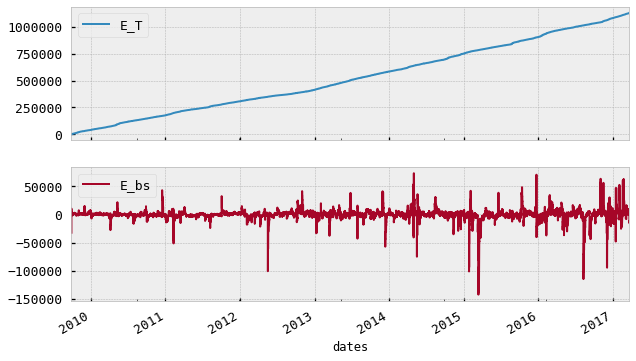

In [65]:
df0[['E_T','E_bs']].plot(subplots=True, figsize=(10,6));

In [66]:
display(df0.describe()/1000)

,bs,E_T,E_bs,absMul,absTheta
count,1129.120000,1129.120000,1129.120000,1.129120e+03,1129.120000
mean,-0.368911,563.432358,-0.353120,3.387870e+06,215214.083153
std,424.866740,325.945805,9.939266,7.267299e+06,230644.953492
min,-122720.979510,0.000000,-142.279615,0.000000e+00,0.353707
25%,-17.922287,281.150750,-2.466245,3.381084e+05,40936.497246
50%,-4.004000,563.430500,-0.006400,1.243607e+06,95291.692023
75%,17.876000,845.710250,2.602636,3.226507e+06,469891.026034
max,103881.575980,1127.990000,73.198231,1.161008e+08,779639.569647


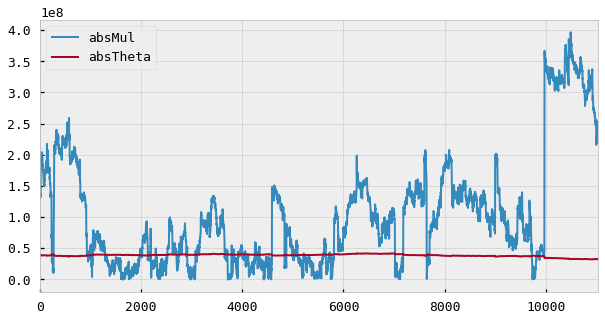

In [67]:
(df0.loc['2010-06',['absMul','absTheta']]
 .reset_index(drop=True)
 .plot(figsize=(10,5)))

In [68]:
def test_t_abs(absTheta,t,E_bs):
    """
    Bool function to test inequality
    *row is assumed to come from df.itertuples()
    -absTheta: float(), row.absTheta
    -t: pd.Timestamp()
    -E_bs: float(), row.E_bs
    """
    return (absTheta >= t*E_bs)

def agg_imbalance_bars(df):
    """
    Implements the accumulation logic
    """
    start = df.index[0]  
    bars = []
    for row in df.itertuples():
        t_abs = row.absTheta
        rowIdx = row.Index
        E_bs = row.E_bs
        
        t = df.loc[start:rowIdx].shape[0]
        if t<1: t=1 # if t lt 1 set equal to 1
        if test_t_abs(t_abs,t,E_bs):
            bars.append((start,rowIdx,t))
            start = rowIdx
    return bars

In [69]:
bars = agg_imbalance_bars(df0)
test_imb_bars = (pd.DataFrame(bars,columns=['start','stop','Ts'])
                 .drop_duplicates())
cprint(test_imb_bars)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      start                stop  Ts
1129083 2017-03-21 15:40:53 2017-03-21 15:40:53   2
1129084 2017-03-21 15:40:53 2017-03-21 15:41:15   3
1129085 2017-03-21 15:41:15 2017-03-21 15:41:44   2
1129086 2017-03-21 15:41:44 2017-03-21 15:41:51   4
1129087 2017-03-21 15:41:51 2017-03-21 15:41:51   3
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 971250 entries, 0 to 1129087
Data columns (total 3 columns):
start    971250 non-null datetime64[ns]
stop     971250 non-null datetime64[ns]
Ts       971250 non-null int64
dtypes: datetime64[ns](2), int64(1)
memory usage: 29.6 MB
None
-------------------------------------------------------------------------------



In [70]:
test_imb_bars.Ts.describe().round()

count    971250.0
mean          3.0
std           2.0
min           1.0
25%           2.0
50%           2.0
75%           3.0
max         139.0
Name: Ts, dtype: float64

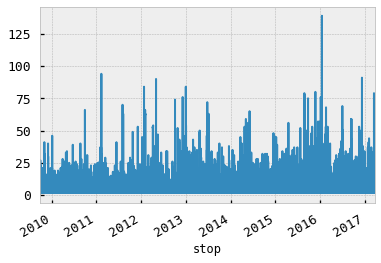

In [71]:
test_imb_bars.set_index('stop')['Ts'].plot()

In [72]:
dvImbBars = df.price.loc[test_imb_bars.stop].drop_duplicates()
cprint(dvImbBars)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                        price
dates                        
2017-03-21 15:27:22  104.1422
2017-03-21 15:35:03  104.0831
2017-03-21 15:35:08  104.0845
2017-03-21 15:37:43  104.0909
2017-03-21 15:40:47  103.9575
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 208564 entries, 2009-09-28 09:30:00 to 2017-03-21 15:40:47
Data columns (total 1 columns):
price    208564 non-null float64
dtypes: float64(1)
memory usage: 3.2 MB
None
-------------------------------------------------------------------------------



In [73]:
dvBar = dv_bar_df.price
cprint(dvBar)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                        price
dates                        
2017-03-21 15:21:50  104.1100
2017-03-21 15:26:40  104.1701
2017-03-21 15:30:38  104.1400
2017-03-21 15:37:43  104.0909
2017-03-21 15:40:53  103.9700
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37783 entries, 2009-09-28 09:46:35 to 2017-03-21 15:40:53
Data columns (total 1 columns):
price    37783 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB
None
-------------------------------------------------------------------------------



In [74]:
dr = returns(dv_bar_df.price)
drImb = returns(dvImbBars)

In [75]:
bar_types = ['dvBar','dvImb']
bar_rets = [dr, drImb]

get_test_stats(bar_types,bar_rets,pd.Series.autocorr)

,sample_size,autocorr_stat
dvBar,37782.0,-0.127882
dvImb,208563.0,-0.077302


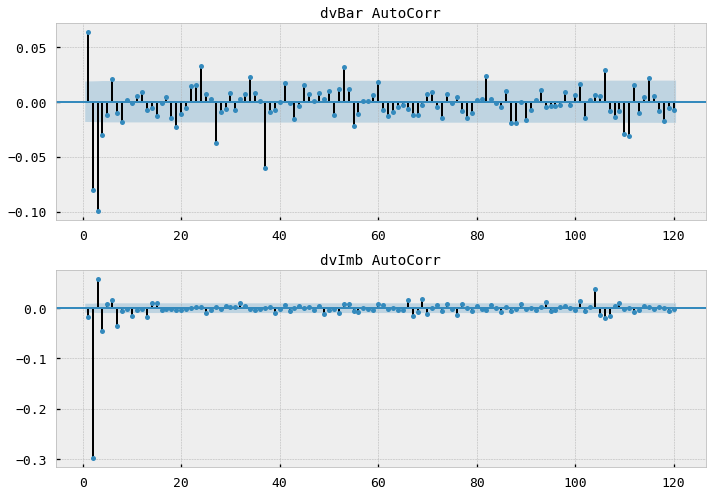

In [76]:
plot_autocorr(bar_types,bar_returns)

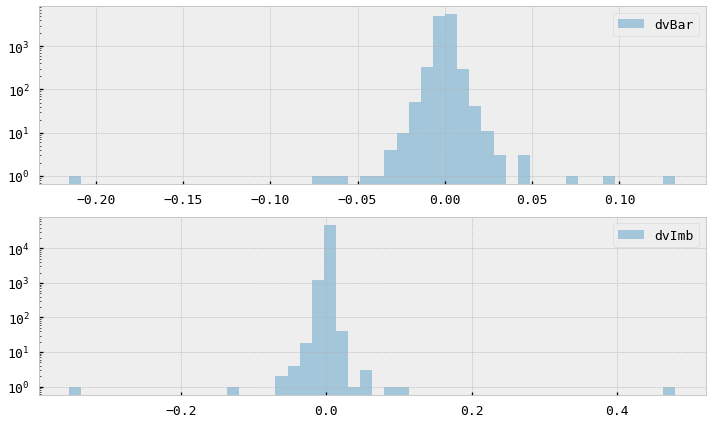

In [77]:
plot_hist(bar_types,bar_returns)

In [78]:
jbs = get_test_stats(bar_types,bar_returns,jb).sort_values('jb_stat')
shaps = (get_test_stats(bar_types,bar_returns,shapiro)
         .sort_values('shapiro_stat')[::-1])

display(jbs,shaps)

,sample_size,jb_stat
dvBar,11290.0,8.326276e+07
dvImb,48436.0,1.896350e+11


,sample_size,shapiro_stat
dvBar,11290.0,0.648796
dvImb,48436.0,0.271589
